# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Load Data

In [2]:
df= pd.read_csv('train_weather_df.csv')

In [3]:
print(df.isna().sum())
df.shape

Unnamed: 0       0
Station          0
Date             0
Tmax             0
Tmin             0
Tavg             0
DewPoint         0
WetBulb          0
Sunrise          0
Sunset           0
CodeSum          0
PrecipTotal      0
StnPressure      0
SeaLevel         0
ResultSpeed      0
ResultDir        0
AvgSpeed         0
year_train       0
month_train      0
day_train        0
Address          0
Species          0
Trap             0
Latitude         0
Longitude        0
NumMosquitos     0
WnvPresent       0
day_weather      0
month_weather    0
year_weather     0
week             0
Species_virus    0
dtype: int64


(10506, 32)

# Explore the Data

In [4]:
#plot correlation heatmap
fig, ax = plt.subplots(figsize=(24, 24))

df_heatmap=df[['Date', 'Address', 'Species',
       'NumMosquitos', 'WnvPresent', 'year_train', 'month_train', 'day_train',
       'week', 'Station', 'Tmax', 'Tmin', 'Tavg', 'AvgSpeed', 'Species_virus', 
        'Latitude', 'Longitude', 'WetBulb','DewPoint', 'PrecipTotal', 'StnPressure']]

dataplot = sns.heatmap(df_heatmap.corr(), cmap="YlGnBu", annot=True, ax=ax)
  
#show heatmap
plt.show()

/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_70107/116908227.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df_heatmap.corr(), cmap="YlGnBu", annot=True, ax=ax)


See positive but very small correlation for WnvPresent: temperature, number of mosquitos, species of mosquito, month, week, precipation total, dew point. 

## Adding new columns 

FROM the CDC website, mosquitoes need to lay eggs near water and larva will emerge AFTER being submerged in water. 

FROM the larva to pupae can take as little as 5 days and another 2-3 days to become an adult. 

With those two things in mind, want to add 5 columns- humidity, 7 AND 10 days earlier temperature and 7 AND 10 days earlier precipation. 

In [5]:
#create a function to load and show image
def load_show_image(x, image_title):
    img=Image.open(x)
    plt.imshow(img)
    plt.title(image_title)

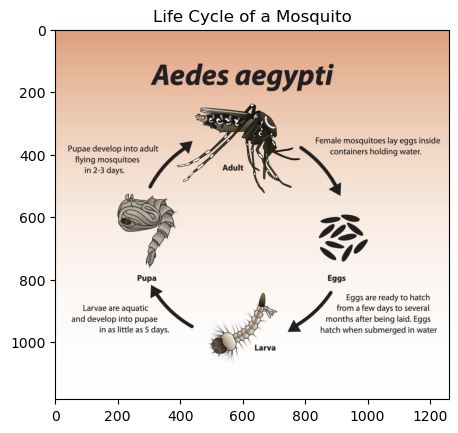

In [6]:
load_show_image('/Users/annaparton/Downloads/Image-2.jpg', 'Life Cycle of a Mosquito')

In [7]:
#to calculate relative humidity need to convert temps to celsius
df['tavg_celsius']= (df['Tavg']-32)* 5/9
df['wetbulb_celsius']= (df['WetBulb']-32)* 5/9

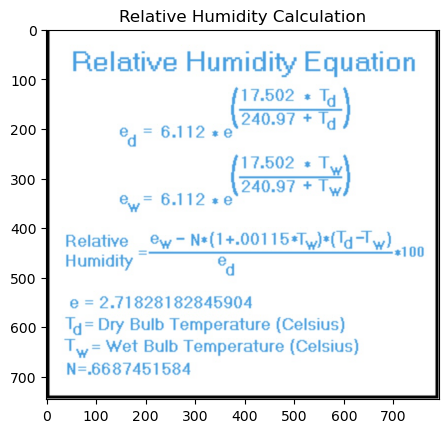

In [8]:
#using function to load and show image
load_show_image('/Users/annaparton/Downloads/Image-1.jpg', 'Relative Humidity Calculation')

#image from https://www.1728.org/relhum.htm

In [9]:
#calculate relative humidity
e_d = 6.112 * np.exp((17.502*df['tavg_celsius'])/(df['tavg_celsius']+240.97))
e_w= 6.112 * np.exp((17.502*df['wetbulb_celsius'])/(df['tavg_celsius']+240.97))
df['relative_humidity']=(e_w-(.6687451584)*(1+(.00115*df['wetbulb_celsius']))*(df['tavg_celsius']- df['wetbulb_celsius']))/(e_d)*100

df.head(20)

,Unnamed: 0,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Sunrise,Sunset,...,NumMosquitos,WnvPresent,day_weather,month_weather,year_weather,week,Species_virus,tavg_celsius,wetbulb_celsius,relative_humidity
0,0,1,2007-05-29,88,60,74,58,65,421,1917,...,1,0,29,5,2007,22,1,23.333333,18.333333,59.899166
1,1,1,2007-05-29,88,60,74,58,65,421,1917,...,1,0,29,5,2007,22,1,23.333333,18.333333,59.899166
2,2,1,2007-05-29,88,60,74,58,65,421,1917,...,1,0,29,5,2007,22,1,23.333333,18.333333,59.899166
3,3,1,2007-05-29,88,60,74,58,65,421,1917,...,1,0,29,5,2007,22,1,23.333333,18.333333,59.899166
4,4,1,2007-05-29,88,60,74,58,65,421,1917,...,4,0,29,5,2007,22,1,23.333333,18.333333,59.899166
5,5,1,2007-05-29,88,60,74,58,65,421,1917,...,1,0,29,5,2007,22,1,23.333333,18.333333,59.899166
6,6,1,2007-05-29,88,60,74,58,65,421,1917,...,1,0,29,5,2007,22,1,23.333333,18.333333,59.899166
7,7,2,2007-05-29,88,65,77,59,66,421,1917,...,2,0,29,5,2007,22,1,25.000000,18.888889,53.704207
8,8,2,2007-05-29,88,65,77,59,66,421,1917,...,1,0,29,5,2007,22,1,25.000000,18.888889,53.704207
9,9,2,2007-05-29,88,65,77,59,66,421,1917,...,1,0,29,5,2007,22,1,25.000000,18.888889,53.704207


In [10]:
#Be able to shift column so many days to see how temperature, precipitation from x days ago affects today
def add_newcol_shift(data, new_col, old_col, x) :
    data.loc[:, new_col]=data[old_col].shift(periods=x)


In [11]:
#adding new columns to df
add_newcol_shift(df, '7day_tavg_c', "tavg_celsius", 7)
add_newcol_shift(df, "14day_tavg_c", "tavg_celsius", 14)
add_newcol_shift(df, "21day_tavg_c", "tavg_celsius", 21)
add_newcol_shift(df, "7day_Precip", "PrecipTotal", 7)
add_newcol_shift(df, "14day_Precip", "PrecipTotal", 14)
add_newcol_shift(df, "21day_Precip", "PrecipTotal", 21)
add_newcol_shift(df, "7day_rel_humidity", "relative_humidity", 7)
add_newcol_shift(df, "14day_rel_humidity", "relative_humidity", 14)
add_newcol_shift(df, "21day_rel_humidity", "relative_humidity", 21)
df.isna().sum()

Unnamed: 0             0
Station                0
Date                   0
Tmax                   0
Tmin                   0
Tavg                   0
DewPoint               0
WetBulb                0
Sunrise                0
Sunset                 0
CodeSum                0
PrecipTotal            0
StnPressure            0
SeaLevel               0
ResultSpeed            0
ResultDir              0
AvgSpeed               0
year_train             0
month_train            0
day_train              0
Address                0
Species                0
Trap                   0
Latitude               0
Longitude              0
NumMosquitos           0
WnvPresent             0
day_weather            0
month_weather          0
year_weather           0
week                   0
Species_virus          0
tavg_celsius           0
wetbulb_celsius        0
relative_humidity      0
7day_tavg_c            7
14day_tavg_c          14
21day_tavg_c          21
7day_Precip            7
14day_Precip          14


In [12]:
def replace_nan(col, x) :
    col.replace(np.nan, x, inplace=True)

In [13]:
#replacing value with previous values
replace_nan(df["7day_tavg_c"], 23)
replace_nan(df["14day_tavg_c"], 23)
replace_nan(df["21day_tavg_c"], 23)
replace_nan(df["7day_Precip"], 0)
replace_nan(df["14day_Precip"], 0)
replace_nan(df["21day_Precip"], 0)
replace_nan(df["7day_rel_humidity"], 53)
replace_nan(df["14day_rel_humidity"], 53)
replace_nan(df["21day_rel_humidity"], 53)

In [14]:
df['daylight_time'] =df['Sunset']-df['Sunrise']

In [15]:
df.head()

,Unnamed: 0,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Sunrise,Sunset,...,7day_tavg_c,14day_tavg_c,21day_tavg_c,7day_Precip,14day_Precip,21day_Precip,7day_rel_humidity,14day_rel_humidity,21day_rel_humidity,daylight_time
0,0,1,2007-05-29,88,60,74,58,65,421,1917,...,23.0,23.0,23.0,0.0,0.0,0.0,53.0,53.0,53.0,1496
1,1,1,2007-05-29,88,60,74,58,65,421,1917,...,23.0,23.0,23.0,0.0,0.0,0.0,53.0,53.0,53.0,1496
2,2,1,2007-05-29,88,60,74,58,65,421,1917,...,23.0,23.0,23.0,0.0,0.0,0.0,53.0,53.0,53.0,1496
3,3,1,2007-05-29,88,60,74,58,65,421,1917,...,23.0,23.0,23.0,0.0,0.0,0.0,53.0,53.0,53.0,1496
4,4,1,2007-05-29,88,60,74,58,65,421,1917,...,23.0,23.0,23.0,0.0,0.0,0.0,53.0,53.0,53.0,1496


In [16]:
df['night_time'] = 2400-df['daylight_time']
df.head()

,Unnamed: 0,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Sunrise,Sunset,...,14day_tavg_c,21day_tavg_c,7day_Precip,14day_Precip,21day_Precip,7day_rel_humidity,14day_rel_humidity,21day_rel_humidity,daylight_time,night_time
0,0,1,2007-05-29,88,60,74,58,65,421,1917,...,23.0,23.0,0.0,0.0,0.0,53.0,53.0,53.0,1496,904
1,1,1,2007-05-29,88,60,74,58,65,421,1917,...,23.0,23.0,0.0,0.0,0.0,53.0,53.0,53.0,1496,904
2,2,1,2007-05-29,88,60,74,58,65,421,1917,...,23.0,23.0,0.0,0.0,0.0,53.0,53.0,53.0,1496,904
3,3,1,2007-05-29,88,60,74,58,65,421,1917,...,23.0,23.0,0.0,0.0,0.0,53.0,53.0,53.0,1496,904
4,4,1,2007-05-29,88,60,74,58,65,421,1917,...,23.0,23.0,0.0,0.0,0.0,53.0,53.0,53.0,1496,904


In [17]:
df.dtypes

Unnamed: 0              int64
Station                 int64
Date                   object
Tmax                    int64
Tmin                    int64
Tavg                    int64
DewPoint                int64
WetBulb                 int64
Sunrise                 int64
Sunset                  int64
CodeSum                object
PrecipTotal           float64
StnPressure           float64
SeaLevel              float64
ResultSpeed           float64
ResultDir               int64
AvgSpeed              float64
year_train              int64
month_train             int64
day_train               int64
Address                object
Species                object
Trap                   object
Latitude              float64
Longitude             float64
NumMosquitos            int64
WnvPresent              int64
day_weather             int64
month_weather           int64
year_weather            int64
week                    int64
Species_virus           int64
tavg_celsius          float64
wetbulb_ce

Creating a new column for how many days since there was precipitation 

In [18]:
#create a binary column: no precipitation = 0 & any amount of precipitation = 1
def precip_binary(x):
    if x > 0 :
        return 1
    else :
        return 0

In [19]:
df['Precip_binary'] = df.apply(lambda df: precip_binary(df['PrecipTotal']), axis=1)
df[120:140]

,Unnamed: 0,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Sunrise,Sunset,...,21day_tavg_c,7day_Precip,14day_Precip,21day_Precip,7day_rel_humidity,14day_rel_humidity,21day_rel_humidity,daylight_time,night_time,Precip_binary
120,120,2,2007-06-26,91,73,82,69,72,418,1931,...,27.222222,0.160,0.160,0.160,62.664440,62.664440,62.664440,1513,887,1
121,121,2,2007-06-26,91,73,82,69,72,418,1931,...,27.222222,0.160,0.160,0.160,62.664440,62.664440,62.664440,1513,887,1
122,122,2,2007-06-26,91,73,82,69,72,418,1931,...,27.222222,0.160,0.160,0.160,62.664440,62.664440,62.664440,1513,887,1
123,123,2,2007-06-26,91,73,82,69,72,418,1931,...,27.222222,0.160,0.160,0.160,62.664440,62.664440,62.664440,1513,887,1
124,124,2,2007-06-26,91,73,82,69,72,418,1931,...,27.222222,0.005,0.160,0.160,59.429797,62.664440,62.664440,1513,887,1
125,125,2,2007-06-26,91,73,82,69,72,418,1931,...,27.222222,0.005,0.160,0.160,59.429797,62.664440,62.664440,1513,887,1
126,126,2,2007-06-26,91,73,82,69,72,418,1931,...,27.222222,0.005,0.160,0.160,59.429797,62.664440,62.664440,1513,887,1
127,127,2,2007-06-26,91,73,82,69,72,418,1931,...,27.222222,0.005,0.160,0.160,59.429797,62.664440,62.664440,1513,887,1
128,128,2,2007-06-26,91,73,82,69,72,418,1931,...,27.222222,0.005,0.160,0.160,59.429797,62.664440,62.664440,1513,887,1
129,129,2,2007-06-26,91,73,82,69,72,418,1931,...,27.222222,0.005,0.160,0.160,59.429797,62.664440,62.664440,1513,887,1


In [30]:
#s = df['Precip_binary'].cumsum()
#df['days_since_precip'] = s.groupby(s).cumcount().add(1).mask(s.eq(0), 0)
#(df[100:220])

,Unnamed: 0,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,PrecipTotal,...,14day_tavg_c,21day_tavg_c,7day_Precip,14day_Precip,21day_Precip,7day_rel_humidity,14day_rel_humidity,21day_rel_humidity,Precip_binary,days_since_precip
100,100,1,2007-06-26,92,70,81,69,72,TSRA BR HZ VCTS,0.16,...,27.222222,13.888889,0.16,0.16,0.27,62.664440,62.664440,70.773813,1,1
101,101,1,2007-06-26,92,70,81,69,72,TSRA BR HZ VCTS,0.16,...,27.222222,13.888889,0.16,0.16,0.27,62.664440,62.664440,70.773813,1,1
102,102,1,2007-06-26,92,70,81,69,72,TSRA BR HZ VCTS,0.16,...,27.222222,13.888889,0.16,0.16,0.27,62.664440,62.664440,70.773813,1,1
103,103,1,2007-06-26,92,70,81,69,72,TSRA BR HZ VCTS,0.16,...,27.222222,13.888889,0.16,0.16,0.27,62.664440,62.664440,70.773813,1,1
104,104,1,2007-06-26,92,70,81,69,72,TSRA BR HZ VCTS,0.16,...,27.222222,13.888889,0.16,0.16,0.27,62.664440,62.664440,70.773813,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,215,1,2007-07-02,79,53,66,50,58,,0.00,...,18.888889,17.777778,0.00,0.00,0.00,60.277749,60.277749,78.608101,0,62
216,216,1,2007-07-02,79,53,66,50,58,,0.00,...,18.888889,17.777778,0.00,0.00,0.00,60.277749,60.277749,78.608101,0,63
217,217,1,2007-07-02,79,53,66,50,58,,0.00,...,18.888889,17.777778,0.00,0.00,0.00,60.277749,60.277749,78.608101,0,64
218,218,1,2007-07-02,79,53,66,50,58,,0.00,...,18.888889,17.777778,0.00,0.00,0.00,60.277749,60.277749,78.608101,0,65


# Visualizing Data

/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_70107/1513478656.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df_heatmap_2.corr(), cmap="YlGnBu", annot=True, ax=ax)


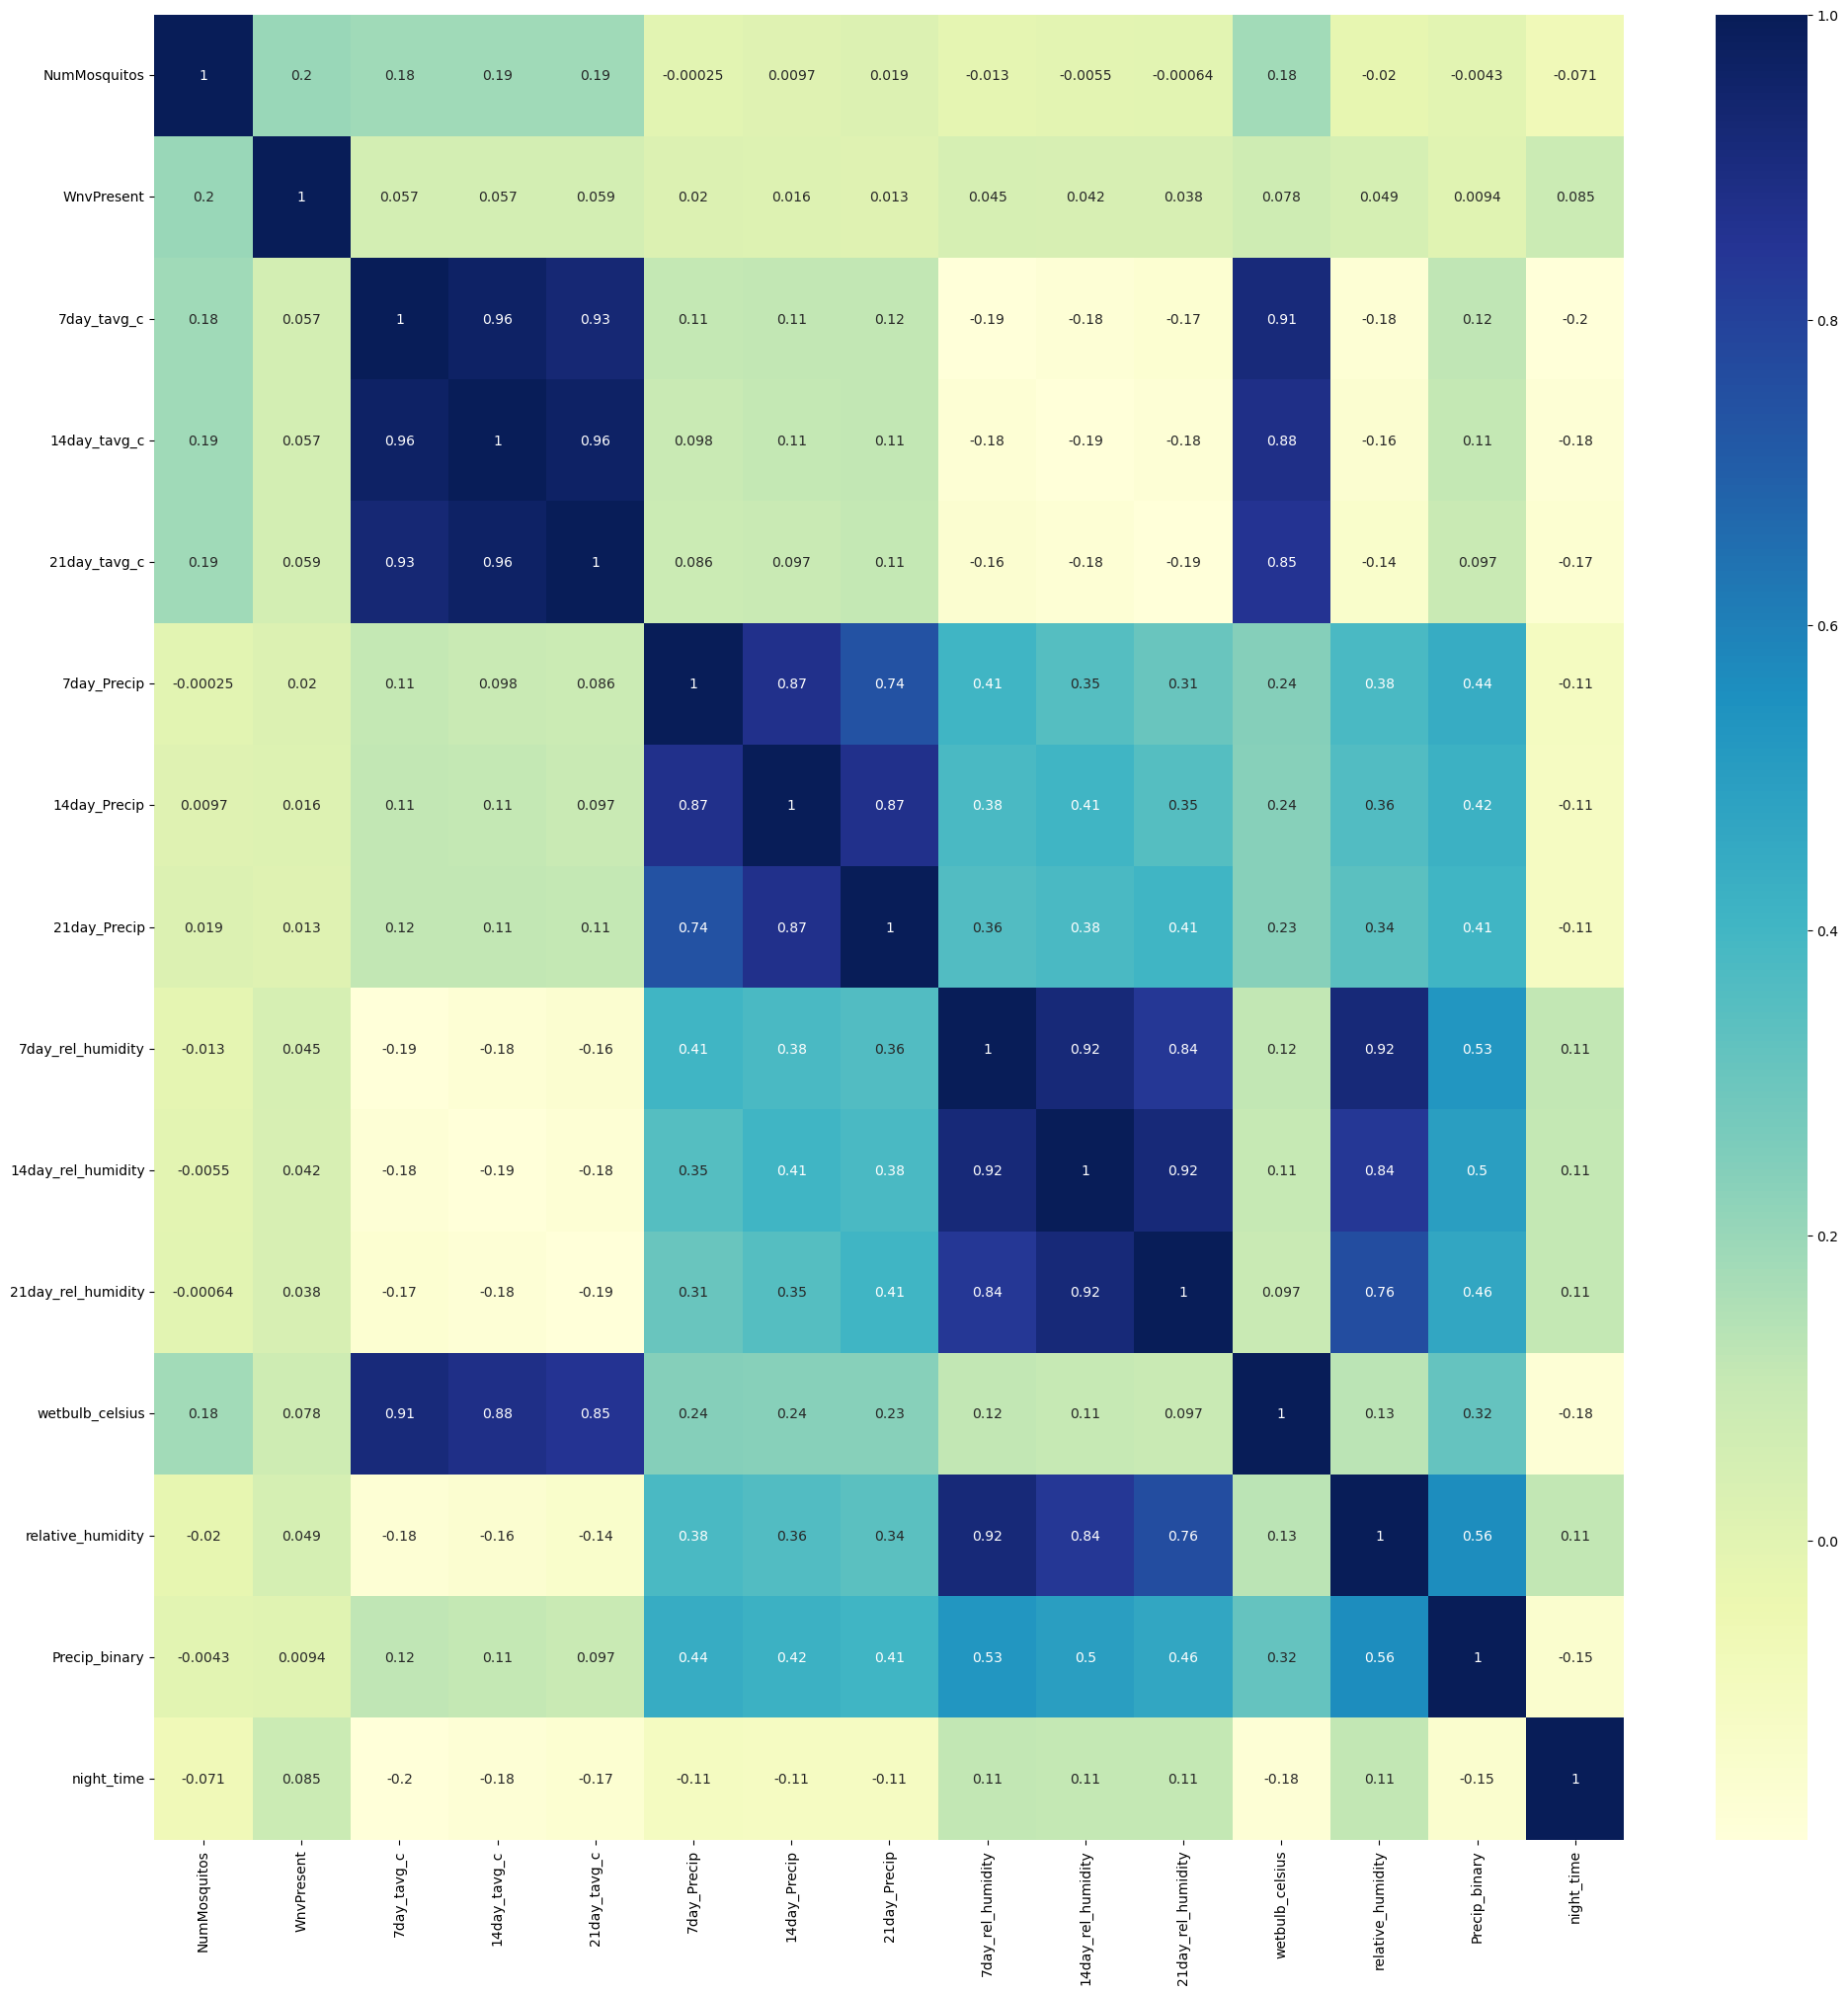

In [20]:
#determining if new columns show any correlation to target variable

fig, ax = plt.subplots(figsize=(24, 24))

df_heatmap_2=df[['Species',
       'NumMosquitos', 'WnvPresent', '7day_tavg_c', '14day_tavg_c', '21day_tavg_c', '7day_Precip', '14day_Precip', '21day_Precip',
                 '7day_rel_humidity', '14day_rel_humidity', '21day_rel_humidity','wetbulb_celsius', 'relative_humidity',
                'Precip_binary', 'night_time']]

dataplot = sns.heatmap(df_heatmap_2.corr(), cmap="YlGnBu", annot=True, ax=ax)
  
#show heatmap
plt.show()

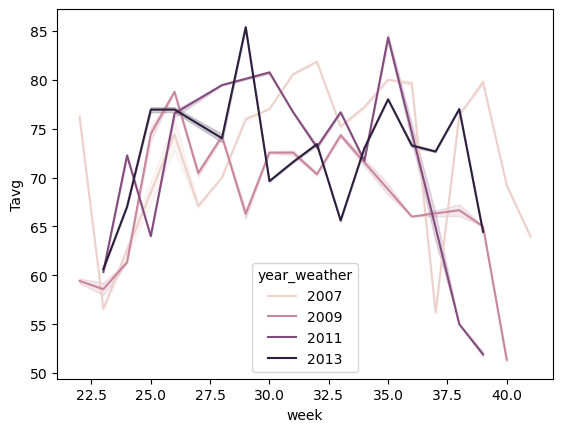

In [21]:
#weather can be drastic from 70s to 50s with short periord of time
sns.lineplot(x="week", y='Tavg', hue='year_weather', data=df)
plt.show()

<AxesSubplot: xlabel='week', ylabel='relative_humidity'>

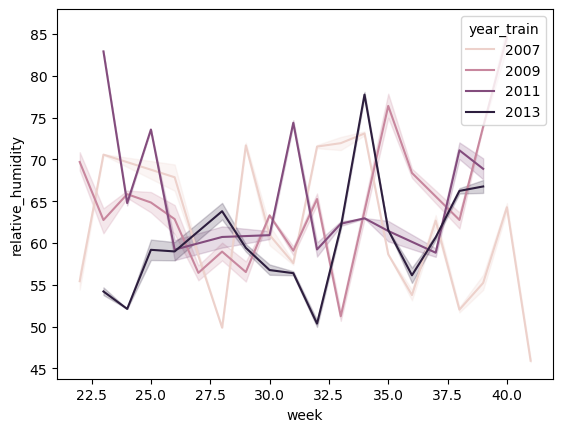

In [22]:
#plotting relative humidity over the weeks
sns.lineplot(y='relative_humidity', x='week', hue='year_train', data=df)

<AxesSubplot: xlabel='week', ylabel='PrecipTotal'>

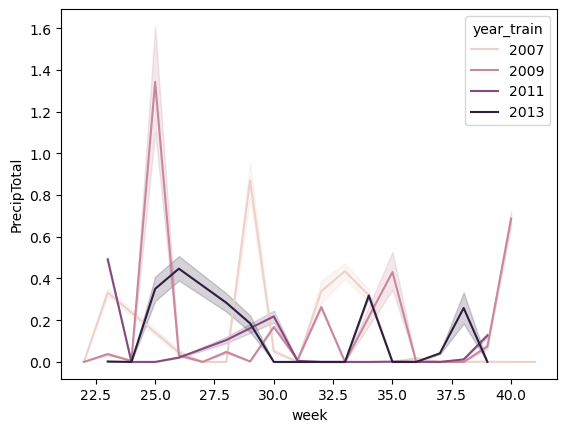

In [23]:
#plotting precipitation over time
sns.lineplot(y='PrecipTotal', x='week', hue='year_train', data=df)

/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_70107/1005933020.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='week', y='14day_tavg_c', hue='WnvPresent', data=df, ci=None)


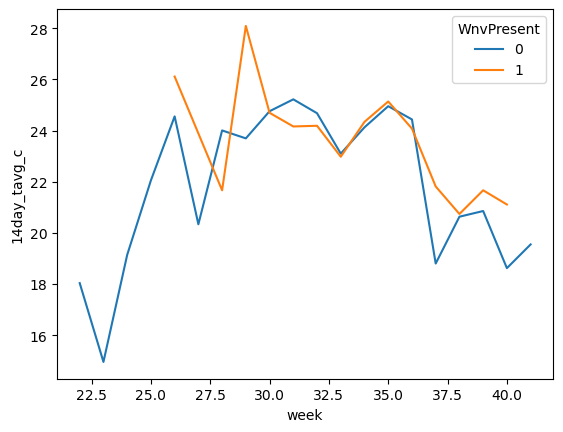

In [24]:
#plotting how 10 days ago weather over current week looks when have the hue parameter set to WnvPresent
sns.lineplot(x='week', y='14day_tavg_c', hue='WnvPresent', data=df, ci=None)
plt.show()

/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_70107/75160594.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='week', y='WnvPresent', data=df, ax=axes[0], ci=None)
/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_70107/75160594.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='week', y='WnvPresent', data=df, ax=axes[1], ci=None)


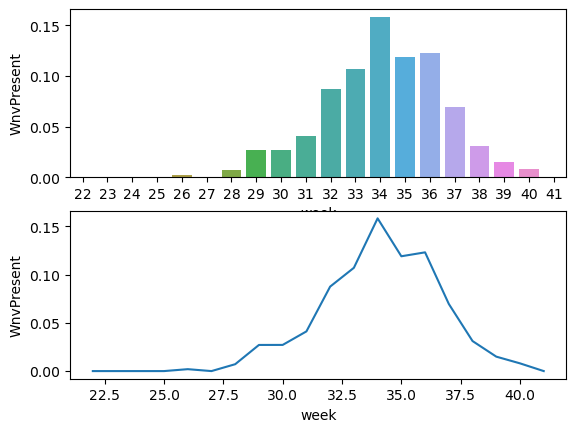

In [25]:
#plotting when WnvPresent over the weeks 
fig, axes = plt.subplots(2)

#barplot WnvPresent over weeks - doing cumalative over the years
sns.barplot(x='week', y='WnvPresent', data=df, ax=axes[0], ci=None)

#lineplot WnvPresent over weeks - doing cumalative over the years
sns.lineplot(x='week', y='WnvPresent', data=df, ax=axes[1], ci=None)

plt.show()

/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_70107/2627270508.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='week', y='14day_tavg_c', hue='WnvPresent', data=df, ax=axes[0], ci=None)
/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_70107/2627270508.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='week', y='14day_tavg_c', hue='WnvPresent', data=df, ax=axes[1], ci=None)


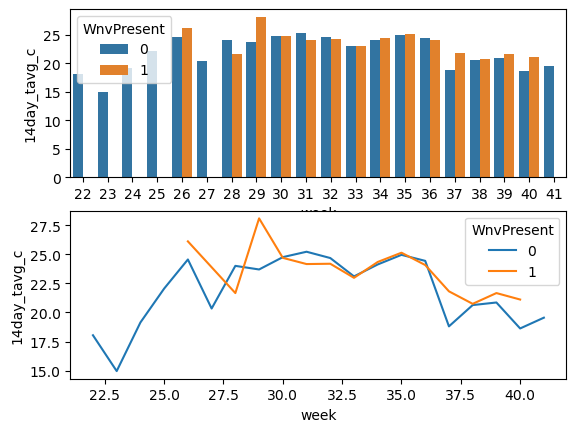

In [26]:
#looking at variables: week, 10day Tavg (temperature 10 days ago), WnvPresent look
fig, axes = plt.subplots(2)

#barplot WnvPresent over weeks - doing cumalative over the years
sns.barplot(x='week', y='14day_tavg_c', hue='WnvPresent', data=df, ax=axes[0], ci=None)

#lineplot WnvPresent over weeks - doing cumalative over the years
sns.lineplot(x='week', y='14day_tavg_c', hue='WnvPresent', data=df, ax=axes[1], ci=None)

plt.show()

From this can see once temperature gets to 75 degrees, then see 10 days later the virus in the traps. Did this BY 
looking at the temperatures 10 days before. 

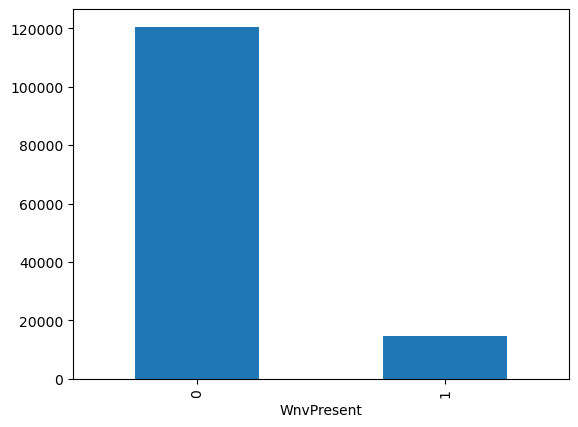

In [27]:
df.groupby('WnvPresent')['NumMosquitos'].sum().plot(kind='bar')
plt.show()

WnvPresent
0    89.25
1    10.75
Name: NumMosquitos, dtype: float64
<class 'pandas.core.series.Series'>
(2,)


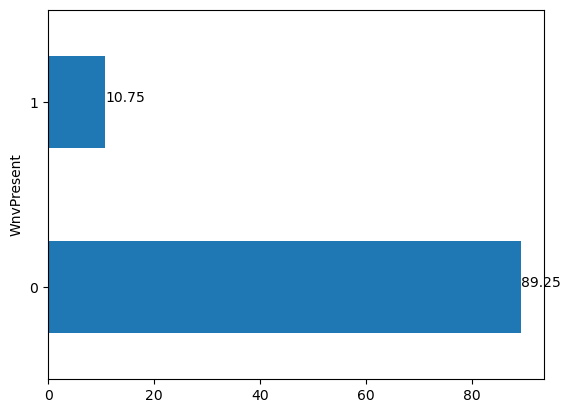

In [28]:
grouped= round((df.groupby('WnvPresent')['NumMosquitos'].sum())/(df['NumMosquitos'].sum()) * 100, 2)
print(grouped)
print(type(grouped))
print(grouped.shape)
grouped.plot(kind='barh')

for index, value in enumerate(grouped):
    plt.text(value, index,
             str(value)) 
plt.show()


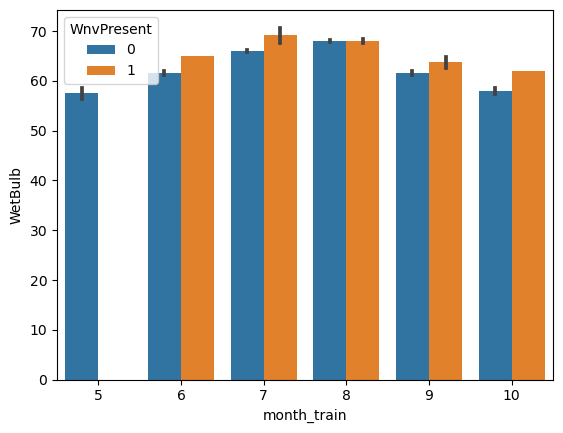

In [29]:
#barplot WnvPresent over months and wetbulb temp - doing cumalative over the years
sns.barplot(x='month_train', y='WetBulb', hue='WnvPresent', data=df)

plt.show()

/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_70107/3433545054.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='week', y='NumMosquitos', hue='WnvPresent', data=df, ci=None)


<AxesSubplot: xlabel='week', ylabel='NumMosquitos'>

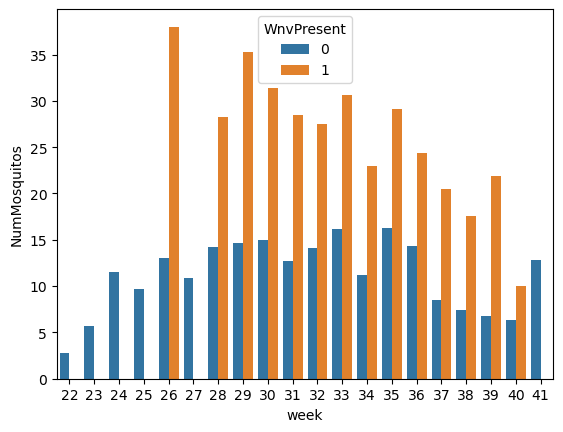

In [30]:
#barplot 
sns.barplot(x='week', y='NumMosquitos', hue='WnvPresent', data=df, ci=None)


/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_70107/3342660696.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month_train', y='NumMosquitos', hue='WnvPresent', data=df, ci=None)


<AxesSubplot: xlabel='month_train', ylabel='NumMosquitos'>

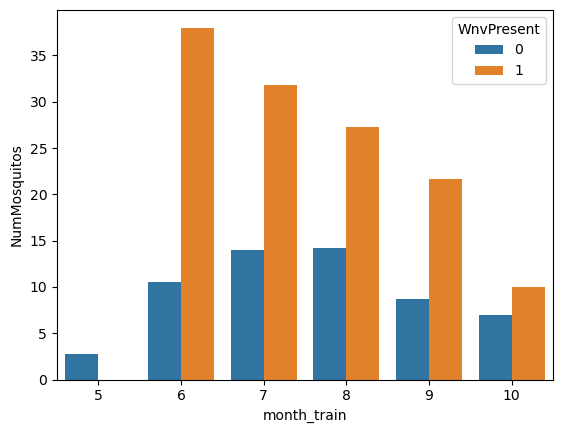

In [31]:
#barplot 
sns.barplot(x='month_train', y='NumMosquitos', hue='WnvPresent', data=df, ci=None)


In [32]:
df_X= df.drop(['Unnamed: 0','Date', 'Address', 'Species', 'Trap', 'CodeSum'], axis=1)
df_X.columns

Index(['Station', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'Sunrise',
       'Sunset', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed',
       'ResultDir', 'AvgSpeed', 'year_train', 'month_train', 'day_train',
       'Latitude', 'Longitude', 'NumMosquitos', 'WnvPresent', 'day_weather',
       'month_weather', 'year_weather', 'week', 'Species_virus',
       'tavg_celsius', 'wetbulb_celsius', 'relative_humidity', '7day_tavg_c',
       '14day_tavg_c', '21day_tavg_c', '7day_Precip', '14day_Precip',
       '21day_Precip', '7day_rel_humidity', '14day_rel_humidity',
       '21day_rel_humidity', 'daylight_time', 'night_time', 'Precip_binary'],
      dtype='object')

['Station', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'Sunrise', 'Sunset', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'year_train', 'month_train', 'day_train', 'Latitude', 'Longitude', 'NumMosquitos', 'day_weather', 'month_weather', 'year_weather', 'Species_virus', 'tavg_celsius', 'wetbulb_celsius', 'relative_humidity', '7day_tavg_c', '14day_tavg_c', '21day_tavg_c', '7day_Precip', '14day_Precip', '21day_Precip', '7day_rel_humidity', '14day_rel_humidity', '21day_rel_humidity', 'daylight_time', 'night_time', 'Precip_binary']


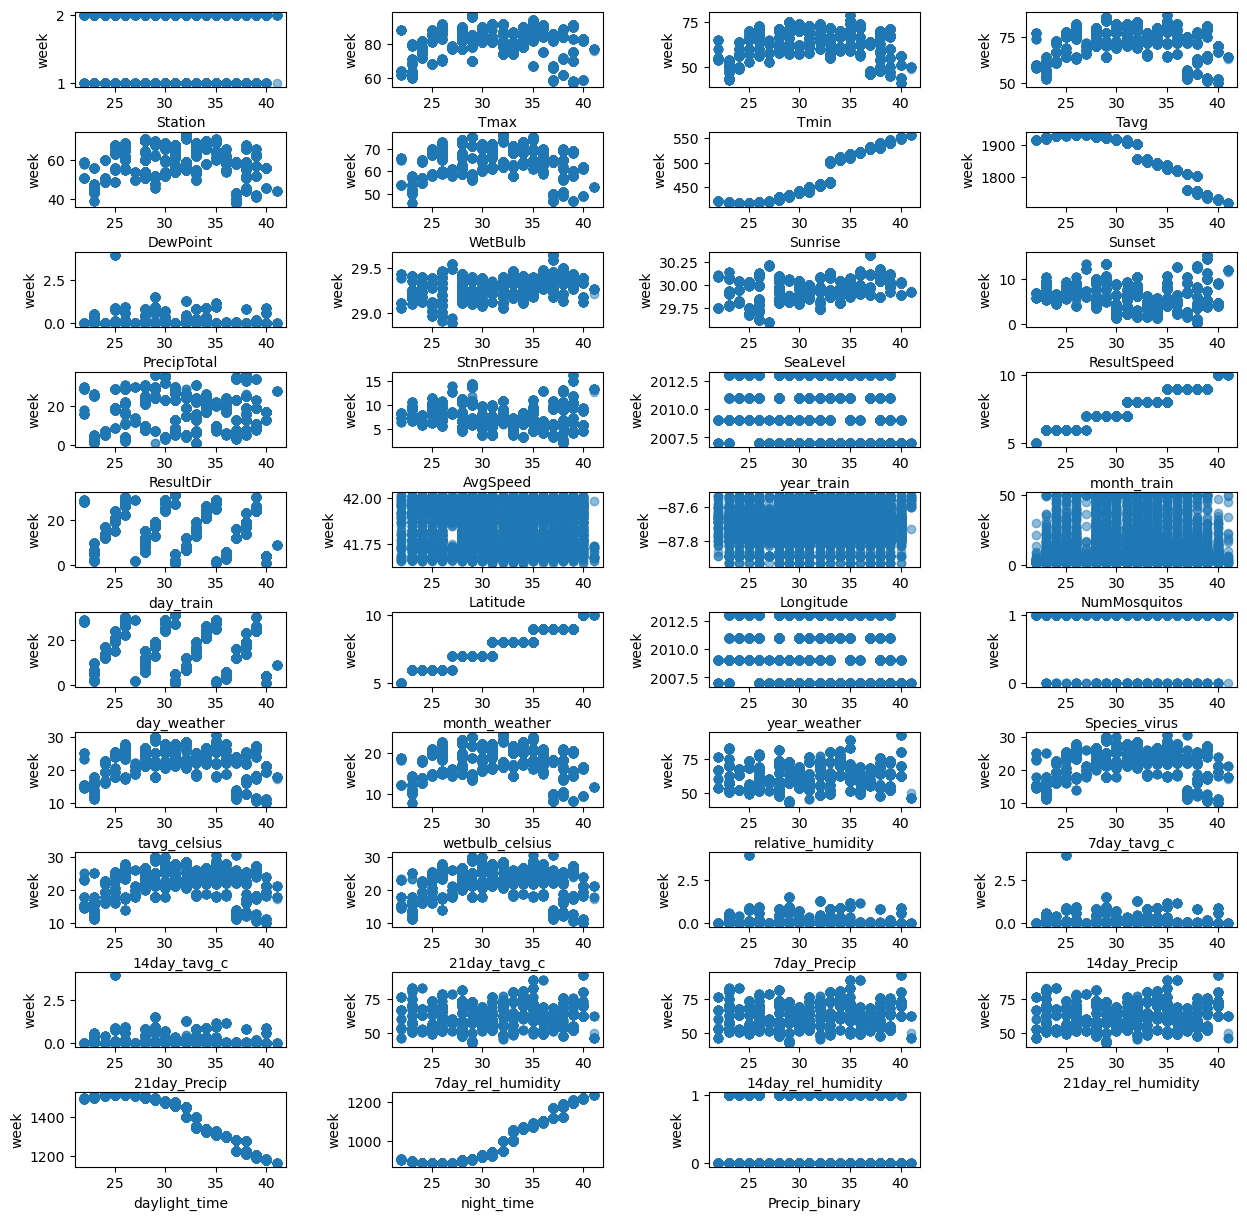

In [33]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(y = col, x = 'week', data=df_X, alpha=0.5)
        ax.set(xlabel=col, ylabel='week')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)
        
features = [i for i in df_X.columns if i not in ['WnvPresent', 'week']]
print(features)

scatterplots(features, ncol=4, figsize=(15, 15))

# Automated EDA

In [29]:
#import packages here because if done above then the graphs above are not displayed on notebook
from autoviz.AutoViz_Class import AutoViz_Class
import sweetviz as sv

Imported v0.1.720. After importing autoviz, execute '%matplotlib inline' to display charts inline.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [30]:
#looking into automating EDA with sweetviz
report=sv.analyze(df)
report.show_html("WnvPresent_EDA_report.html")

                                             |      | [  0%]   00:00 -> (? left)

Report WnvPresent_EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [31]:
 #looking into automating EDA with AutoViz
AV = AutoViz_Class()

dft = AV.AutoViz(
    "",
    sep=",",
    depVar="",
    dfte=df,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="server",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

Shape of your Data Set loaded: (10506, 37)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    37 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']
14 numeric variables in data exceeds limit, taking top 30 variables
    List of variables selected: ['PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'AvgSpeed', 'Latitude', 'Longitude', '7day_Tavg', '10day_Tavg', '7day_Precip', '10day_Precip', 'tavg_celsius', 'wetbulb_celsius', 'relative_humidity']
   Total columns > 30, too numerous to print.
No scatter plots with depVar when no depVar is given.
pair_scatters can be found in URL below:
Launching server at http://localhost:58291
dis

# Saving df to csv file

In [34]:
df.to_csv('project2_df.csv')